In [125]:
# % cd ..

In [164]:
import numpy as np
import torch
import torch.nn.functional as F
import torchtext.vocab as vocab
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [217]:
vocab = vocab.GloVe(name="6B", dim=100)

In [218]:
def get_glove_word(word):
    return vocab.vectors[vocab.stoi[word]]

In [132]:
rw_embeddings = np.load("./eval/out_embeddings.npy").item()
rw_attns = np.load("./eval/out_attns.npy").item()
rw_defns = np.load("./eval/out_defns.npy").item()

In [134]:
rw = rw_embeddings.keys()

In [276]:
rw[500:550]

['benefited',
 'enlarger',
 'characters',
 'intercession',
 'extraterritorial',
 'reassuringly',
 'enjoining',
 'reclassifications',
 'organismal',
 'portioned',
 'inharmonious',
 'seasonable',
 'circumferential',
 'consigning',
 'disbelieving',
 'immensely',
 'traitorous',
 'discharged',
 'dispersive',
 'thoughtless',
 'communistic',
 'unequivocal',
 'carbonate',
 'brisker',
 'trichloride',
 'inflammation',
 'philanthropy',
 'impassively',
 'monoculture',
 'smoothen',
 'socialites',
 'defrauding',
 'algebras',
 'flatulence',
 'evacuated',
 'carburettors',
 'encrust',
 'flighted',
 'highjacking',
 'refresher',
 'eldership',
 'antitumor',
 'punctuate',
 'transverse',
 'approachable',
 'prolapse',
 'continuously',
 'mistrustful',
 'disturbance',
 'sulfuric']

**Attention**

In [246]:
def visualize_attn(word):
    """
    Visualize the attention
    """
    plt.figure(figsize=(20,1))
    plt.title("Attention for: {}".format(word))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(rw_attns[word][np.newaxis,:], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, yticklabels=False,
            cbar=False, xticklabels=rw_defns[word].split())

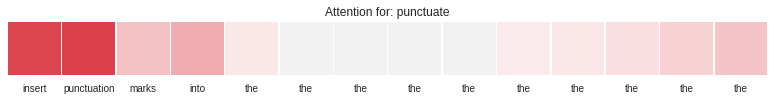

In [289]:
visualize_attn("punctuate")

**Evaluation: Semantic meaning of 10 closest words.**

In [280]:
def closest_words(vec, n=10):
    vec = torch.FloatTensor(vec)
    vec_normed = vec / torch.norm(vec)
    all_dists = [(w, torch.dist(vec_normed, get_glove_word(w) / torch.norm(get_glove_word(w)))) for w in vocab.itos]
    return sorted(all_dists, key=lambda t: t[1])[:n]

In [284]:
vec = rw_embeddings["antitumor"]

In [285]:
closest_words(vec)

[(u'prostate', 0.6929826140403748),
 (u'cancer', 0.7075775265693665),
 (u'colorectal', 0.7248782515525818),
 (u'cancers', 0.744085967540741),
 (u'melanoma', 0.746403157711029),
 (u'breast', 0.759292483329773),
 (u'ovarian', 0.760877251625061),
 (u'chemotherapy', 0.7742590308189392),
 (u'leukemia', 0.7865822315216064),
 (u'treatments', 0.8031073808670044)]